# "Shrimp"-ly Amazing

#### Final Project Script - Reads data from a CSV file and processes the data into a DataFrame.  It then outputs the DataFrame into a new, filtered CSV file.  Next, it converts this same CSV file into a GeoDataFrame and produces visualizations.

##### Author: Caroline Freshcorn
##### Date (Last Updated): 2020-11-20

In [1]:
!pip install geopandas

     |████████████████████████████████| 972kB 4.3MB/s 
     |████████████████████████████████| 6.5MB 12.0MB/s 
     |████████████████████████████████| 14.8MB 240kB/s 


In [2]:
import geopandas as gpd
from shapely.geometry import Point

import os
import os.path

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Set file path.
path_input = input("Please enter the file path, "
                   "including the name of the .csv file: "
                  )
file_path = path_input

Please enter the file path, including the name of the .csv file: /content/datadownload.csv


In [4]:
# Open raw CSV dataset and convert to DataFrame.
df = pd.read_csv(file_path)
location_data = df.copy()

In [5]:
# Preview the DataFrame.
location_data

,Year,Region,Species,Latitude,Latitude_std_err,Longitude,Longitude_std_err
0,1970,Scotian Shelf,ALL,0.000000,0.000000,0.000000,0.000000
1,1970,Scotian Shelf,Alosa pseudoharengus,43.569235,0.000000,-66.898432,0.000000
2,1970,Scotian Shelf,Amblyraja radiata,44.509685,0.112841,-60.533022,0.447286
3,1970,Scotian Shelf,Ammodytes dubius,44.137920,0.004390,-60.516954,0.044082
4,1970,Scotian Shelf,Anarhichas lupus,44.213237,0.155695,-62.552607,0.419857
...,...,...,...,...,...,...,...
37569,2019,Northeast US Spring,Urophycis regia,38.483291,0.225908,-73.145709,0.233768
37570,2019,Northeast US Spring,Urophycis tenuis,42.937164,0.118018,-67.904944,0.168514
37571,2019,Northeast US Spring,Zenopsis conchifer,39.478279,0.356023,-71.276297,0.942053
37572,2019,Northeast US Spring,Zoarces americanus,41.689038,0.152838,-69.217526,0.294161


In [6]:
# Drop null values and first row containing not applicable data.
location_data = location_data.dropna()
location_data = location_data[1:]

In [7]:
# Check everything was deleted properly.
location_data

,Year,Region,Species,Latitude,Latitude_std_err,Longitude,Longitude_std_err
1,1970,Scotian Shelf,Alosa pseudoharengus,43.569235,0.000000,-66.898432,0.000000
2,1970,Scotian Shelf,Amblyraja radiata,44.509685,0.112841,-60.533022,0.447286
3,1970,Scotian Shelf,Ammodytes dubius,44.137920,0.004390,-60.516954,0.044082
4,1970,Scotian Shelf,Anarhichas lupus,44.213237,0.155695,-62.552607,0.419857
5,1970,Scotian Shelf,Argentina silus,42.752972,0.055061,-65.727570,0.268712
...,...,...,...,...,...,...,...
37568,2019,Northeast US Spring,Urophycis chuss,42.165761,0.158953,-68.787590,0.224457
37569,2019,Northeast US Spring,Urophycis regia,38.483291,0.225908,-73.145709,0.233768
37570,2019,Northeast US Spring,Urophycis tenuis,42.937164,0.118018,-67.904944,0.168514
37571,2019,Northeast US Spring,Zenopsis conchifer,39.478279,0.356023,-71.276297,0.942053


In [8]:
# Extract rows pertaining only to species of shrimp.
shrimp_species = [
                  "Argis lar", 
                  "Argis spp.", 
                  "Bryozoa spp.", 
                  "Chilomycterus schoepfii", 
                  "Crangon Communis", 
                  "Crangon spp.", 
                  "Litopenaeus setiferus", 
                  "Mesopenaeus tropicalis", 
                  "Metapenaeopsis goodei", 
                  "Pandalopsis dispar", 
                  "Pandalus eous", 
                  "Pandalus goniurus", 
                  "Pandalus hypsinotus", 
                  "Pandalus jordani", 
                  "Pandalus platyceros", 
                  "Pandalus spp.", 
                  "Parapenaeus politus", 
                  "Pasiphaea pacifica", 
                  "Penaeus aztecus", 
                  "Penaeus duorarum", 
                  "Sclerocrangon boreas", 
                  "Sergestes similis", 
                  "Sicyonia brevirostris", 
                  "Sicyonia burkenroadi", 
                  "Sicyonia dorsalis", 
                  "Solenocera spp.", 
                  "Squilla chydaea", 
                  "Squilla empusa", 
                  "Trachypeneus spp."
                 ]

In [9]:
# Extract shrimp data entries.
matching_species = location_data.Species.isin(shrimp_species)
shrimp_filtered = location_data[matching_species]

In [10]:
# Restrict attributes to time series and location.
shrimp_filtered = shrimp_filtered[["Year", "Latitude", "Longitude"]]
shrimp_filtered = shrimp_filtered.reset_index(drop=True)

In [11]:
# Preview new filtered DataFrame.
shrimp_filtered

,Year,Latitude,Longitude
0,1977,44.622069,-124.586271
1,1977,44.350098,-124.617399
2,1977,41.141669,-124.022447
3,1980,47.587431,-125.037137
4,1982,57.799354,-163.730971
...,...,...,...
887,2019,29.090959,-89.928955
888,2019,28.205080,-83.899027
889,2019,28.358133,-84.174052
890,2019,27.856871,-83.679907


In [12]:
# Save new CSV file with just this filtered data.
shrimp_filtered.to_csv("cleaned_shrimpdata.csv")

In [16]:
# Begin processing this new CSV dataset for a GeoDataFrame.
gpd_location_data = gpd.read_file("cleaned_shrimpdata.csv")
gpd_location_data = gpd_location_data.drop(columns = ["field_1"])

/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [17]:
# Insert coordinates into GeoDataFrame's geometry column from longitude and latitude of CSV file.
gpd_location_data['geometry'] = gpd_location_data.apply(lambda x: Point(float(x.Longitude), float(x.Latitude)), axis=1)

In [18]:
# Create the GeoDataFrame.
shrimp_info = gpd.GeoDataFrame(gpd_location_data, geometry=gpd_location_data.geometry)

In [20]:
# View GeoDataFrame.
shrimp_info

,Year,Latitude,Longitude,geometry
0,1977,44.62206921,-124.58627140000002,POINT (-124.58627 44.62207)
1,1977,44.35009805,-124.61739909999999,POINT (-124.61740 44.35010)
2,1977,41.14166904,-124.02244679999998,POINT (-124.02245 41.14167)
3,1980,47.58743088,-125.03713729999998,POINT (-125.03714 47.58743)
4,1982,57.79935437,-163.73097090000002,POINT (-163.73097 57.79935)
...,...,...,...,...
887,2019,29.090959,-89.92895515,POINT (-89.92896 29.09096)
888,2019,28.20508004,-83.89902704,POINT (-83.89903 28.20508)
889,2019,28.35813331,-84.17405222,POINT (-84.17405 28.35813)
890,2019,27.85687104,-83.67990742,POINT (-83.67991 27.85687)


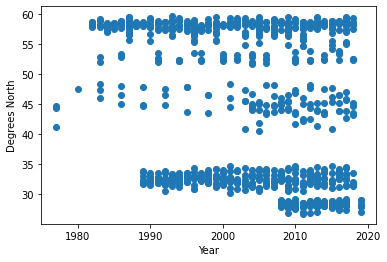

In [19]:
# Create visualization of latitude over time.
x = shrimp_filtered["Year"]
y = shrimp_filtered["Latitude"]
plt.scatter(x,y)
plt.xlabel("Year")
plt.ylabel("Degrees North")
plt.show()